# A/B Testing in Mobile Games

## Scenario

The dataset consists of A/B test results for a mobile game called Cookie Cats, which was used to study the impact of changing a game feature on player engagement. Specifically, the test involved moving the first gate in the game from level 30 to level 40 to evaluate if this change would influence player behavior. Players who installed the game during the testing period were randomly assigned to one of two groups: the control group (gate_30), where the gate was at level 30, and the experimental group (gate_40), where the gate was moved to level 40.

## Goal

When a player installed the game **Cookie Cats**, they were randomly assigned to one of two groups: gate_30 or gate_40. The dataset contains A/B test results that evaluate the impact of moving the first gate in the game from level 30 to level 40. By applying an A/B test, we aim to determine which gate location—level 30 or level 40—yields better player engagement and retention, guiding the decision on where the game should position its gate for optimal performance.

## Dataset

This is an open-source dataset sourced from Kaggle.com:

- **userid**: A unique identifier for each player.
- **version**: Indicates whether the player was assigned to the control group (gate_30) or the experimental group (gate_40), representing the original and modified game gate locations.
- **sum_gamerounds**: The total number of game rounds played by the player during the first 14 days after installation.
- **retention_1**: Indicates whether the player returned and played the game 1 day after installation.
- **retention_7**: Indicates whether the player returned and played the game 7 days after installation.

## A/B Testing

There are seven steps that are generally followed while performing A/B testing - 
1) Understand business objective
2) Set hypothesis testing parameters such as null and alternative hypothesis. Significance level and power of the test
3) Design of experiment, that is, choosing randomization unit and target population
4) Running the experiments and collection of data
5) Validity checks on the collected data
6) Interpret Results
7) Take launch decision based on the results observed

# Step 1 -  Business Objective

The business objective for the **Cookie Cats** game is to optimize player engagement and retention by determining the impact of changing the first gate from level 30 to 40. This aims to enhance user experience and increase revenue through higher player activity and return rates.

# Step 2 - Hypothesis Testing

To analyze the impact of changing the gate level in the **Cookie Cats** game, we define the parameters for hypothesis testing as follows:

- **Null Hypothesis (H₀):** The gate level (level 30 or level 40) does not significantly affect player retention 
- **Alternative Hypothesis (H₁):** The gate level (level 30 or level 40) significantly affects player retention

We set the significance level at **5% (α = 0.05)**.

# Step 3 - Experiment Design

The experiment targets **Cookie Cats** players, with randomization at the player level. Players are assigned to either gate_30 (control) or gate_40 (test), and metrics like **retention** and **game rounds played** are compared to assess the impact of gate placement.

# Step 4 - Run the Experiment

This step has been taken care of and we have the data from the experiement. Now we move on to analyze this data and interpret the results

# Step 5 - Validating Checks

## Libraries Installation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import normaltest
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest
import functions as func
import utilities as visuals

## Data Retrieval

In [2]:
cookie_cats = pd.read_csv("cookie_cats.csv")
print(cookie_cats.shape)
cookie_cats.head()

cookie_cats = cookie_cats[cookie_cats['sum_gamerounds'] > 0]

print(f"Updated dataset size: {cookie_cats.shape}")
print(cookie_cats.head(10))


(90189, 5)
Updated dataset size: (86195, 5)
    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3        False        False
1      337  gate_30              38         True        False
2      377  gate_40             165         True        False
3      483  gate_40               1        False        False
4      488  gate_40             179         True         True
5      540  gate_40             187         True         True
7     1444  gate_40               2        False        False
8     1574  gate_40             108         True         True
9     1587  gate_40             153         True        False
10    1842  gate_40               3        False         True


In [3]:
cookie_cats.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

## Data Cleaning

In [4]:
cookie_cats.isna().any().any()

False

No Missing Values

In [5]:
cookie_cats.duplicated().any()

False

No Duplicate Values

## Exploratory Data Analysis

### Understanding Data

#### Descriptive statistics overview

In [6]:
cookie_cats.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,86195.0,4.997584e+06,2.883574e+06,116.0,2513084.0,4995751.0,7495043.5,9999861.0
sum_gamerounds,86195.0,5.427606e+01,1.991916e+02,1.0,6.0,18.0,54.0,49854.0


### Sample size and proportions overview

In [7]:
sample_sizes = cookie_cats.version.value_counts()
sample_sizes

version
gate_40    43432
gate_30    42763
Name: count, dtype: int64

Sample sizes are almost similar. As gate_30 has 42763 users, gate_40 has 43432 users who played atleast one gameround.

In [8]:
total_samples = sample_sizes.sum()
proportions = (sample_sizes / total_samples) * 100
print(proportions)

version
gate_40    50.388074
gate_30    49.611926
Name: count, dtype: float64


gate_30 accounts for 49.6% of the sample, while gate_40 accounts for 50.3%.

#### Number of users

In [9]:
cookie_cats.userid.nunique()

86195

### Sample ratio mismatch check

In [10]:
print(cookie_cats['version'].value_counts())

# Calculate the observed sample sizes for each group
observed_counts = cookie_cats['version'].value_counts()

total_samples = observed_counts.sum()
expected_counts = [total_samples / len(observed_counts)] * len(observed_counts)

chi2_stat, p_value, dof, expected = chi2_contingency([observed_counts, expected_counts])

print(f"Observed Counts: {observed_counts.values}")
print(f"Expected Counts: {expected}")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Sample Ratio Mismatch detected")
else:
    print("No Sample Ratio Mismatch detected")


version
gate_40    43432
gate_30    42763
Name: count, dtype: int64
Observed Counts: [43432 42763]
Expected Counts: [[43264.75 42930.25]
 [43264.75 42930.25]]
Chi-Square Statistic: 2.580751204695435
P-value: 0.1081703161976975
No Sample Ratio Mismatch detected


### Visualization

#### Separate by Gate Level

**Objective:**  
To effectively define the target metric and select appropriate statistical tests, it is crucial to first analyze the features and their relationships with the different gate levels.

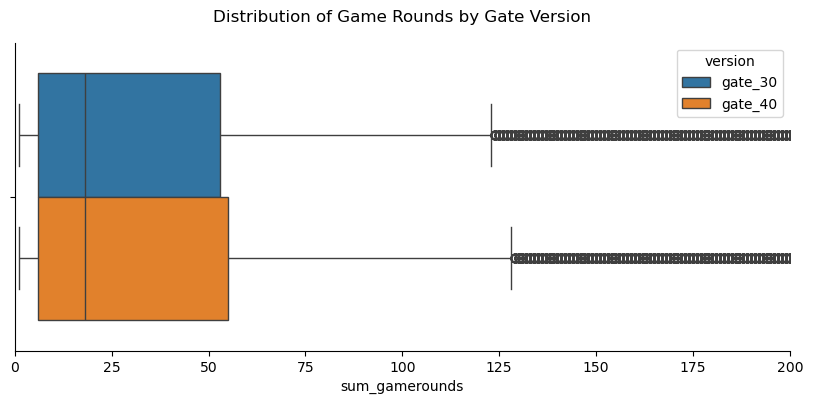

In [11]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=cookie_cats, x='sum_gamerounds', hue='version')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlim(0, 200)
plt.xlabel('sum_gamerounds')
plt.title('Distribution of Game Rounds by Gate Version', pad=15)
plt.show()

### Boxplot Analysis: Game Rounds Played by Users

This boxplot compares the distribution of game rounds played by users for two versions of a mobile game: **gate_30** and **gate_40**. Key observations include:

- Both versions have **similar medians**, with most players completing a low number of rounds.
- **Gate_40** exhibits **greater variability** (wider interquartile range, IQR) and a broader spread, as indicated by longer whiskers.
- Both versions have **significant outliers**, particularly for higher game rounds, suggesting a few highly engaged players.
- Overall, **gate_40 displays more variation** in user behavior, potentially reflecting differences in engagement influenced by the game version.

This analysis highlights how user engagement varies between the two game versions and points to potential factors affecting retention and gameplay.l

In [12]:
cookie_cats.groupby(['version']).describe()['sum_gamerounds']

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,42763.0,54.832332,262.217984,1.0,6.0,18.0,53.0,49854.0
gate_40,43432.0,53.728357,105.093012,1.0,6.0,18.0,55.0,2640.0


##### Total number of game rounds played in each version

In [13]:
cookie_cats.groupby(['version'])['sum_gamerounds'].sum()

version
gate_30    2344795
gate_40    2333530
Name: sum_gamerounds, dtype: int64

#### Retention Rates: Day 1 and Day 7

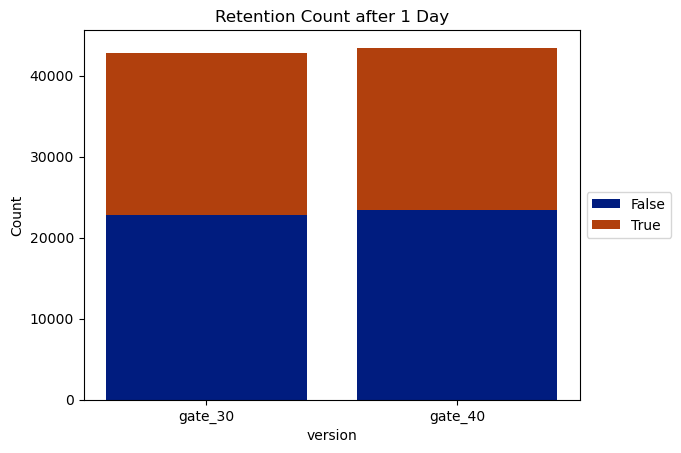

In [14]:
visuals.stacked_bar_plot(cookie_cats, col='version', hue='retention_1', 
                 title='Retention Count after 1 Day')

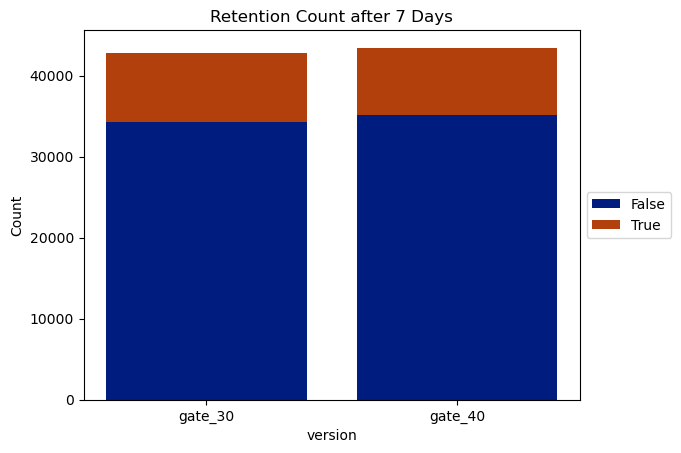

In [15]:
visuals.stacked_bar_plot(cookie_cats, col='version', hue='retention_7', 
                 title='Retention Count after 7 Days')

In [16]:
#calculate retention rate
proportions = (
    cookie_cats.groupby("version")
    .agg(
        {
            "userid": "count",
            "retention_1": lambda x: (x == 1).sum(),
            "retention_7": lambda x: (x == 1).sum(),
        }
    )
    .reset_index()
)
proportions["ret1_prop"] = (proportions["retention_1"] / proportions["userid"]) * 100
proportions["ret7_prop"] = (proportions["retention_7"] / proportions["userid"]) * 100
proportions

,version,userid,retention_1,retention_7,ret1_prop,ret7_prop
0,gate_30,42763,19993,8486,46.753034,19.844258
1,gate_40,43432,20073,8266,46.217075,19.032050


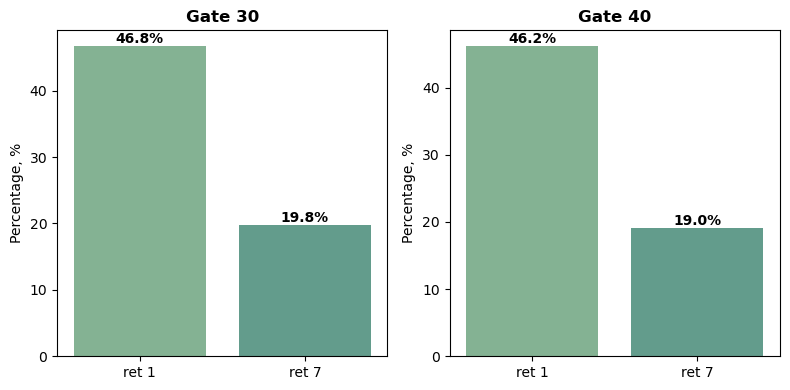

In [17]:
# Extracting data for Gate 30 and Gate 40 retention percentages
gate_data = {
    "Gate 30": {
        "x": ["ret 1", "ret 7"],
        "y": [proportions.loc[0, "ret1_prop"], proportions.loc[0, "ret7_prop"]]
    },
    "Gate 40": {
        "x": ["ret 1", "ret 7"],
        "y": [proportions.loc[1, "ret1_prop"], proportions.loc[1, "ret7_prop"]]
    }
}

visuals.retention_percentage_bar_plot(gate_data)

The average number of game rounds played during the first 14 days after installation was similar for both versions of the game, but version gate_30 had a standard deviation nearly twice as high as version gate_40, indicating more variability in gameplay. Additionally, retention rates on day 1 and day 7 were comparable between the two versions, although the difference in retention rates became more noticeable after 7 days, with version gate_40 showing slightly better sustained engagement.

The **Chi Square test** will be employed for this analysis as it is suitable for categorical data. This test will determine whether there is a significant difference in the retention rate between the two game versions. The significance level for all tests is set at **0.05**.

**Statistical Test: Chi Square Test**

**Assumptions:**
- The data should consist of **two categorical and independent variables**.
- Each variable should have **two groups** (e.g., gate_30 and gate_40).

**Analysis Plan:**
To strengthen our analysis beyond just descriptive statistics, we will use the Chi Square test to determine if the observed differences in 1-day and 7-day retention rates between the two versions are statistically significant. This will help us draw more informed conclusions about the retention performance of each game version.

# Step 6 - Interpret Results 

After analyzing the data from multiple perspectives, it is clear that the 7-day retention rates exhibit significant differences between the game versions, while the average number of game rounds played during the first 14 days shows only minor variations.

## Target Metric 
Although the average number of game rounds played ('sum_gamerounds') was similar between the two versions, the large standard deviation suggests that this metric may lack the sensitivity needed for clear conclusions. Therefore, analyzing the retention rates may provide more meaningful insights. The primary target metric is to determine if **version gate_30** has a higher 7-day retention rate, which reflects the game’s lasting appeal and long-term player engagement.

In [18]:
# Chi-Square Test for Retention 1
contingency_table_ret1 = pd.crosstab(cookie_cats['version'], cookie_cats['retention_1'])

chi2_stat_ret1, p_value_ret1, degrees_of_freedom_ret1, expected_frequencies_ret1 = chi2_contingency(contingency_table_ret1)

print("\n--- Chi-Square Test Results for Retention 1 ---")
results_ret1_df = pd.DataFrame({
    'Statistic': ['Chi-Square Statistic', 'P-value', 'Degrees of Freedom'],
    'Value': [chi2_stat_ret1, p_value_ret1, degrees_of_freedom_ret1]
})
print(results_ret1_df.to_string(index=False, header=True))

# Expected Frequencies for Retention 1
print("\n--- Expected Frequencies for Retention 1 ---")
expected_frequencies_ret1_df = pd.DataFrame(expected_frequencies_ret1,
                                            columns=contingency_table_ret1.columns,
                                            index=contingency_table_ret1.index)
print(expected_frequencies_ret1_df.to_string(float_format="{:.2f}".format, header=True))

# Chi-Square Test for Retention 7
contingency_table_ret7 = pd.crosstab(cookie_cats['version'], cookie_cats['retention_7'])

chi2_stat_ret7, p_value_ret7, degrees_of_freedom_ret7, expected_frequencies_ret7 = chi2_contingency(contingency_table_ret7)

print("\n--- Chi-Square Test Results for Retention 7 ---")
results_ret7_df = pd.DataFrame({
    'Statistic': ['Chi-Square Statistic', 'P-value', 'Degrees of Freedom'],
    'Value': [chi2_stat_ret7, p_value_ret7, degrees_of_freedom_ret7]
})
print(results_ret7_df.to_string(index=False, header=True))

# Expected Frequencies for Retention 7
print("\n--- Expected Frequencies for Retention 7 ---")
expected_frequencies_ret7_df = pd.DataFrame(expected_frequencies_ret7,
                                            columns=contingency_table_ret7.columns,
                                            index=contingency_table_ret7.index)
print(expected_frequencies_ret7_df.to_string(float_format="{:.2f}".format, header=True))



--- Chi-Square Test Results for Retention 1 ---
           Statistic    Value
Chi-Square Statistic 2.466634
             P-value 0.116287
  Degrees of Freedom 1.000000

--- Expected Frequencies for Retention 1 ---
retention_1    False    True 
version                      
gate_30     22885.49 19877.51
gate_40     23243.51 20188.49

--- Chi-Square Test Results for Retention 7 ---
           Statistic    Value
Chi-Square Statistic 9.026391
             P-value 0.002661
  Degrees of Freedom 1.000000

--- Expected Frequencies for Retention 7 ---
retention_7    False   True 
version                     
gate_30     34452.01 8310.99
gate_40     34990.99 8441.01


### Retention Rate Analysis

**Formula for Retention Rate:**
Retention Rate=(Total Number of Players/Number of True Retentions)×100
### **Interpretation for Retention 1**
- **Null Hypothesis (H₀):**  
  There is no association between the version (`gate_30` or `gate_40`) and `retention_1`.
- **Result:**  
  The p-value (0.116287) is greater than the commonly used significance level (e.g., 0.05).  
  **Conclusion:**  
  We fail to reject the null hypothesis. There is insufficient evidence to suggest a significant association between the version and `retention_1`.

### **Interpretation for Retention 7**
- **Null Hypothesis (H₀):**  
  There is no association between the version (`gate_30` or `gate_40`) and `retention_7`.
- **Result:**  
  The p-value (0.002661) is less than the commonly used significance level (e.g., 0.05).  
  **Conclusion:**  
  We reject the null hypothesis. There is strong evidence of a significant association between the version and `retention_7`.


### **Summary**
- **Retention 1:** No significant association with version.  
- **Retention 7:** Significant association with version.  

**Implication:**  
This suggests that the retention behavior over a 7-day period is influenced by the version (`gate_30` vs. `gate_40`), whereas the 1-day retention does not show such influence.

To complement the Chi-Square test results, performing D'Agostino and Pearson's Test on the data columns (retention_1 and retention_7) provides insights into whether the data distribution is normal, which can guide subsequent test selections and interpretations.

Here’s the adapted analysis for retention_1 and retention_7:

### Analyzing Normality Using D'Agostino and Pearson's Test

D'Agostino and Pearson's Test is used to determine if a data sample follows a normal distribution. This is important for choosing appropriate statistical tests (e.g., t-tests, ANOVA) that assume normality.

- **Purpose**: Assesses if data (e.g., `retention_1`, `retention_7`) follows a normal distribution.
- **Method**: Evaluates skewness and kurtosis and calculates a test statistic with a p-value.
- **Interpretation**:
  - **High p-value (> 0.05)**: Fail to reject the null hypothesis, indicating data is likely normally distributed, allowing for parametric tests.
  - **Low p-value (< 0.05)**: Reject the null hypothesis, suggesting data is not normally distributed, recommending non-parametric tests instead.

In [19]:
# Perform D'Agostino and Pearson's Test for retention_1
stat_ret1, p_value_ret1 = normaltest(cookie_cats['retention_1'])
print(f"D'Agostino and Pearson's Test for retention_1:")
print(f"Test Statistic: {stat_ret1:.4f}, p-value: {p_value_ret1:.4e}")
if p_value_ret1 < 0.05:
    print("Reject the null hypothesis: The data for retention_1 does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: The data for retention_1 follows a normal distribution.")

# Perform D'Agostino and Pearson's Test for retention_7
stat_ret7, p_value_ret7 = normaltest(cookie_cats['retention_7'])
print(f"\nD'Agostino and Pearson's Test for retention_7:")
print(f"Test Statistic: {stat_ret7:.4f}, p-value: {p_value_ret7:.4e}")
if p_value_ret7 < 0.05:
    print("Reject the null hypothesis: The data for retention_7 does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: The data for retention_7 follows a normal distribution.")

D'Agostino and Pearson's Test for retention_1:
Test Statistic: 297448.7338, p-value: 0.0000e+00
Reject the null hypothesis: The data for retention_1 does not follow a normal distribution.

D'Agostino and Pearson's Test for retention_7:
Test Statistic: 19004.6897, p-value: 0.0000e+00
Reject the null hypothesis: The data for retention_7 does not follow a normal distribution.


### Summary
- Both `retention_1` and `retention_7` do not follow a normal distribution (based on D'Agostino and Pearson's Test results).  
- This supports the choice of the **Chi-Square test** for analyzing associations between categorical variables (such as version and retention outcomes), as the Chi-Square test does not assume normality.  
- These results reinforce the significance of the findings from the Chi-Square test, specifically for `retention_7`, which demonstrated a strong association with the version.  


## Confidence Interval

In [20]:
cookie_cats['retention_7'] = cookie_cats['retention_7'].astype(int)
versions = ['gate_30', 'gate_40']
ci_results = [func.ci_bootstrap(data=cookie_cats[cookie_cats['version'] == 
                                            version]['retention_7']) for 
              version in versions]
ci_df_bootstrap = pd.DataFrame(ci_results, columns=['Mean', 'CI Lower', 'CI Upper'])
ci_df_bootstrap['Version'] = ['Gate 30', 'Gate 40']
ci_df_bootstrap = ci_df_bootstrap[['Version', 'Mean', 'CI Lower', 'CI Upper']]
ci_df_bootstrap

,Version,Mean,CI Lower,CI Upper
0,Gate 30,0.198265,0.194865,0.202020
1,Gate 40,0.190343,0.186498,0.194097


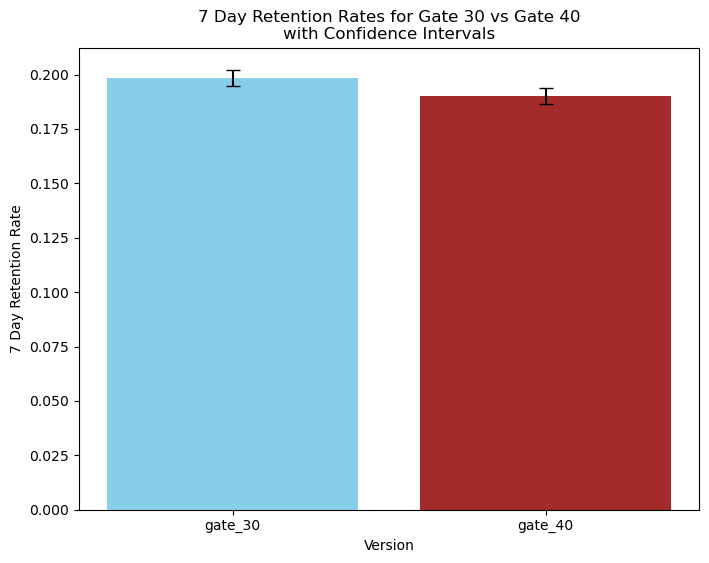

In [21]:
df = cookie_cats.groupby('version')['retention_7'].agg(['mean', 'count']).reset_index()

df['ci_lower'] = df['mean'] - 1.96 * (df['mean'] * (1 - df['mean']) / df['count'])**0.5 
df['ci_upper'] = df['mean'] + 1.96 * (df['mean'] * (1 - df['mean']) / df['count'])**0.5
df['error_lower'] = df['mean'] - df['ci_lower']
df['error_upper'] = df['ci_upper'] - df['mean']

versions = df['version'].tolist()
means = df['mean'].tolist()
errors = [df['error_lower'].tolist(), df['error_upper'].tolist()]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(versions, means, yerr=errors, color=['skyblue', 'brown'], capsize=5)
ax.set_xlabel('Version')
ax.set_ylabel('7 Day Retention Rate')
ax.set_title('7 Day Retention Rates for Gate 30 vs Gate 40\nwith Confidence Intervals')

plt.show()


### Bar Plot Analysis: 7-Day Retention Rates

This bar plot illustrates the **7-day retention rates** for **gate_30** and **gate_40**, which are nearly identical, both hovering around **20%**. Key observations include:

- **Overlapping confidence intervals** indicate no statistically significant difference between the two versions.
- Changing the gate from **30 to 40** appears to have **minimal impact on user retention** within the first week.

These findings suggest that altering the gate position does not significantly influence user behavior in terms of retention over a 7-day period.

## Estimated Treatment Difference

### Estimating the Difference Between Proportions with Confidence

In [22]:
proportions

,version,userid,retention_1,retention_7,ret1_prop,ret7_prop
0,gate_30,42763,19993,8486,46.753034,19.844258
1,gate_40,43432,20073,8266,46.217075,19.032050


In [23]:
success = proportions["retention_7"].tolist()  
nobs = proportions["userid"].tolist() 

z_stat, p_value = proportions_ztest(success, nobs)

p1 = success[0] / nobs[0]  
p2 = success[1] / nobs[1]

diff = p1 - p2
se_diff = np.sqrt((p1 * (1 - p1) / nobs[0]) + (p2 * (1 - p2) / nobs[1]))
diff_ci = st.norm.interval(0.95, loc=diff, scale=se_diff)
print(f"Z-statistic: {z_stat}, P-value: {p_value}")
print(f"95% Confidence Interval for the difference in proportions: ({diff_ci[0]}, {diff_ci[1]})")


Z-statistic: 3.013003335580102, P-value: 0.0025867607438543124
95% Confidence Interval for the difference in proportions: (0.00283828003184016, 0.013405875671817176)


Since the p-value is less than 0.05 and the confidence interval (CI) for the difference in proportions does not include zero, there is sufficient evidence to reject the null hypothesis (H₀). This indicates a statistically significant difference between the gate_30 and gate_40 versions in terms of 7-day retention. 

Based on the estimated difference in proportions between the two independent samples, we conclude that the gate_30 version demonstrates a significantly higher 7-day retention success rate compared to the gate_40 version.

# Step 7 - Decision

Based on the analysis of retention rates, hypothesis testing, and bootstrap confidence intervals, it is evident that **Gate 30** significantly outperforms **Gate 40** in terms of 7-day retention rates. The p-value from hypothesis testing is less than 0.05, and the confidence intervals for the difference in proportions do not include zero, further supporting this conclusion.  

To maximize player retention, it is recommended to continue using Gate 30 as the gating strategy. Moving to Gate 40 could negatively impact the retention rates and overall user engagement.

# Further Improvements

Extending retention analysis to 14 or 30 days helps identify long-term player engagement patterns and assess whether gate placement impacts retention over time. This deeper insight can reveal if players who stay engaged longer are more likely to make in-game purchases, indicating a potential link between gate placement and monetization. Integrating these findings allows for data-driven strategies to optimize both player retention and revenue.